In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

/Users/learning/opt/anaconda3/envs/notebook/lib/python3.8/site-packages/scipy/__init__.py:113: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.11.3)
  warnings.warn("Numpy 1.13.3 or above is required for this version of "


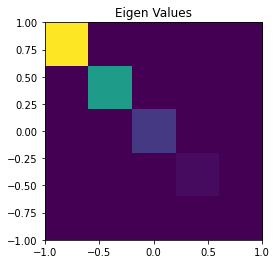

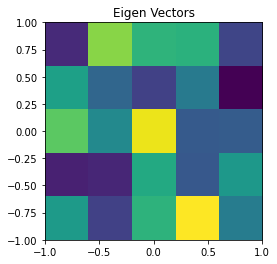

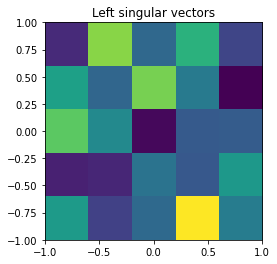

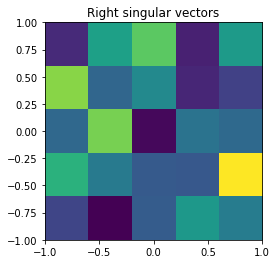

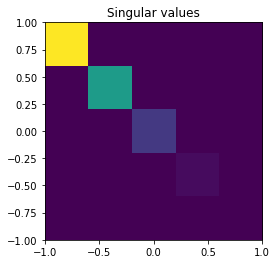

[[-0.61450503  0.53318385 -0.25616282  0.23365759 -0.4667797 ]
 [ 0.11969529 -0.26902186  0.49181702 -0.1436949  -0.80670197]
 [ 0.41057649 -0.03923564 -0.77261801 -0.34728756 -0.33517201]
 [-0.65761251 -0.63411513 -0.1850592  -0.35641195  0.06455548]
 [ 0.08384116 -0.48959247 -0.24761085  0.82287167 -0.12182345]]
[[-0.61450503  0.11969529  0.41057649 -0.65761251  0.08384116]
 [ 0.53318385 -0.26902186 -0.03923564 -0.63411513 -0.48959247]
 [-0.25616282  0.49181702 -0.77261801 -0.1850592  -0.24761085]
 [ 0.23365759 -0.1436949  -0.34728756 -0.35641195  0.82287167]
 [-0.4667797  -0.80670197 -0.33517201  0.06455548 -0.12182345]]
[[-0.  0. -1. -0. -0.]
 [-0. -0.  1. -0.  0.]
 [ 0. -0. -2. -0.  0.]
 [-0. -0. -0.  0.  0.]
 [ 0. -0. -0. -0. -0.]]


In [4]:
# Challenge 1:
# SVD vs eigendecomposition for square symmetric matrices.

# create a symmetric matrix (5x5)
A = np.random.randn(5, 5)
A = A @ A.T

# eig (L, W)
L, W = np.linalg.eig(A)

# eigen vectors are not sorted, lets do that
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:, sidx]

# svd (U, S, V)
U, S, V = np.linalg.svd(A)

# images of all matrices
plt.title("Eigen Values")
plt.imshow(np.diag(L), extent=[-1, 1, -1, 1])
plt.show()

plt.title("Eigen Vectors")
plt.imshow(W, extent=[-1, 1, -1, 1])
plt.show()

plt.title("Left singular vectors")
plt.imshow(U, extent=[-1, 1, -1, 1])
plt.show()

plt.title("Right singular vectors")
plt.imshow(V, extent=[-1, 1, -1, 1])
plt.show()

plt.title("Singular values")
plt.imshow(np.diag(S), extent=[-1, 1, -1, 1])
plt.show()

# compare U and V, and between U and W
print(U)
print(V)

print(np.round(U - W))

In [51]:
# Challenge 2: U from eigendecomposition of A.T @ A

# create a matrix (3x6 matrix)
A = np.random.randn(3, 6)

# full SVD (variables Us, Ss, Vs)
Us, Ss, Vs = np.linalg.svd(A)

# eig of A.T @ A (variable L, V)
L, V = np.linalg.eig(A.T @ A)

# confirm that V == Vs
sidx = np.argsort(L)[::-1]
L = L[sidx]
V = V[:, sidx]

print(np.round(V - Vs.T))

# check the relationship between Ss and L
print(np.sort(Ss)**2)
print(np.sort(L))

U_comp = np.zeros((3, 3))

# create U using only A, V, and L
for i in range(0, 3):
    U_comp[:, i] = A @ V[:, i].T / np.sqrt(L[i])

print('\n')
print(Us)
print(U_comp)

# confirm that U == Us

[[ 1.  2.  0. -0.  0.  0.]
 [ 0. -0. -0.  0. -0. -0.]
 [-1.  0. -0. -0.  0. -0.]
 [ 1. -0.  0. -1.  1.  0.]
 [ 0.  0.  0.  1. -2. -0.]
 [ 1. -1.  0.  0. -0. -0.]]
[2.3459448  6.05588734 9.59753949]
[-4.70925339e-16  1.02756416e-16  1.37402873e-15  2.34594480e+00
  6.05588734e+00  9.59753949e+00]


[[-0.22568512 -0.8696925  -0.43897744]
 [ 0.79765336 -0.42365891  0.42925778]
 [-0.55929897 -0.25327474  0.78932665]]
[[ 0.22568512  0.8696925  -0.43897744]
 [-0.79765336  0.42365891  0.42925778]
 [ 0.55929897  0.25327474  0.78932665]]


In [15]:
# Challenge 3: AtA, Av and singular vectors
m = 4
A = np.random.randn(m, m)

AtA = A.T @ A
AAt = A @ A.T

U, S, V = np.linalg.svd(AtA)

diffs = np.zeros(m)
for i in range(0, m):
    diffs[i] = np.sum((AAt @ A @ U[:, i] - A @ U[:, i] * S[i]) ** 2)

diffs

array([1.52724896e-28, 3.59424750e-29, 1.67415296e-28, 1.08559645e-28])

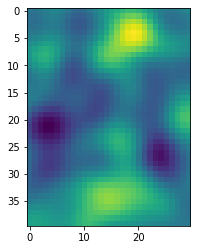

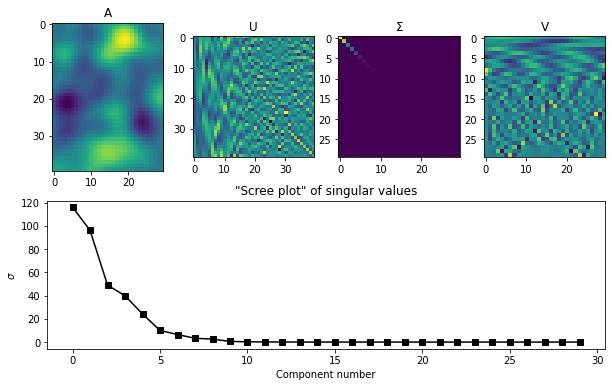

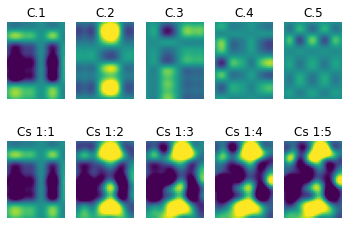

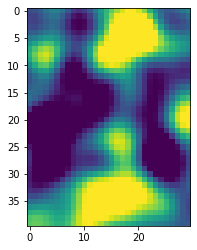

In [10]:
# Spectral theory of matrices. Similar to SVD its just how we compose the data

# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int((m + n) / 4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = signal.convolve2d(np.random.randn(m, n), g2d, "same")

plt.imshow(A)
plt.show()

# SVD
U, S, V = np.linalg.svd(A)

# show the constituent matrices
fig = plt.subplots(1, figsize=(10, 6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title("$\Sigma$")

plt.subplot(244)
plt.imshow(V)
plt.title("V")

plt.subplot(212)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

# lets recreate the matrix but with a lower dimensionality of data (5)
rank1mats = np.zeros((5, m, n))

for i in range(0, 5):
    # create a rank 1 matrix
    rank1mats[i, :, :] = np.outer(U[:, i] * S[i], V[i, :])

    plt.subplot2grid((2, 5), (0, i))
    plt.imshow(rank1mats[i, :, :], vmin=-5, vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))

    plt.subplot2grid((2, 5), (1, i))
    imdat = np.sum(rank1mats[:i+1, :, :], axis=0)
    plt.imshow(imdat, vmin=-5, vmax=5)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(A, vmin=-5, vmax=5)
plt.show()


In [11]:
# Low-rank approximations
nComps = 5

Ur = U[:, 0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps, :]

# Low-rank approximation
reconImage = Ur@np.diag(Sr)@Vr

# rank (confirm same as nComps)
print("rank = ", np.linalg.matrix_rank(reconImage))


rank =  5


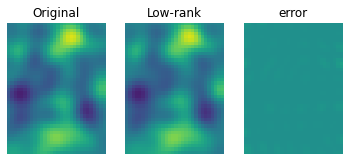

In [14]:
# error map and percent difference from original matrix
errormap = (reconImage - A)**2

# show the results
plt.subplot(131)
plt.imshow(A, vmin=-15, vmax=15)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage, vmin=-15, vmax=15)
plt.axis('off')
plt.title('Low-rank')

plt.subplot(133)
plt.imshow(errormap, vmin=-15, vmax=15)
plt.axis('off')
plt.title('error')
plt.show()

In [11]:
# Explore the relation between U * V.T - what is the norm & is it orthogonal?
# generate a matrix such that U * V.T is valid
# has to be square?
M = 4
A = np.random.randn(M, M)

U, S, V = np.linalg.svd(A)
UvT = U @ V

# norm of U, norm of V, norm of U * V.T
normU = np.linalg.norm(U, 2)
normV = np.linalg.norm(V, 2)
normUvT = np.linalg.norm(UvT, 2)
print(normU)
print(normV)
print(normUvT)

# U*U.T, V*V.T, U * V.T.
print(np.round(U@U.T, 3))
print(np.round(V.T@V, 3))
print(np.round(U@V, 3))

1.0000000000000002
1.0000000000000002
1.0000000000000004
[[ 1.  0.  0. -0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  1. -0.]
 [-0. -0. -0.  1.]]
[[ 1. -0.  0.  0.]
 [-0.  1. -0. -0.]
 [ 0. -0.  1.  0.]
 [ 0. -0.  0.  1.]]
[[ 0.286 -0.15  -0.656  0.682]
 [-0.25  -0.796 -0.36  -0.417]
 [-0.872 -0.027  0.118  0.473]
 [ 0.308 -0.585  0.653  0.37 ]]


In [12]:
# Moore-Penrose Pseudo Inverse Implementation Example

# the matrix
A = [ [1,2,3],
      [1,2,4], # hint: change 2->0 for invertible matrix to test
      [1,2,5]  ]
  
# SVD
U,S,V = np.linalg.svd(A)

# pseudoinvert S
nonzeroels = S>10**-14 # find nonzero elements (>rounding errors)
S[nonzeroels] = 1/S[nonzeroels] # invert only those elements

# now pseudoinvert A
Ai = V.T@np.diag(S)@U.T

# it's sortof close to I...?
print( Ai@A ), print(' ')

# compute with pinv function
print( np.linalg.pinv(A)@A )


[[ 2.00000000e-01  4.00000000e-01  5.55111512e-17]
 [ 4.00000000e-01  8.00000000e-01  0.00000000e+00]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]
 
[[ 2.00000000e-01  4.00000000e-01 -1.11022302e-16]
 [ 4.00000000e-01  8.00000000e-01  0.00000000e+00]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]


In [13]:
import inspect
lines = inspect.getsource(np.linalg.pinv)
print(lines)

@array_function_dispatch(_pinv_dispatcher)
def pinv(a, rcond=1e-15, hermitian=False):
    """
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.

    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.

    .. versionchanged:: 1.14
       Can now operate on stacks of matrices

    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values less than or equal to
        ``rcond * largest_singular_value`` are set to zero.
        Broadcasts against the stack of matrices.
    hermitian : bool, optional
        If True, `a` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for finding singular values.
        Defaults to False.

        .. versionadded:: 1.17.0

    Returns
    -------
    

In [19]:
# Create matrix with desired condition number
m = 6
n = 16

condnum = 42

# create singular vectors matrices
U, junk = np.linalg.qr(np.random.randn(m, m))
V, junk = np.linalg.qr(np.random.randn(n, n))

# create singular values matrices

s = np.linspace(condnum, 1, min(m, n))
S = np.zeros((m, n))
for i in range(0, len(S)):
    S[i, i] = s[i]

# create the matrix
A = U @ S @ V.T

np.linalg.cond(A)


41.99999999999997

Text(0.5, 1.0, 'A, cond=42')

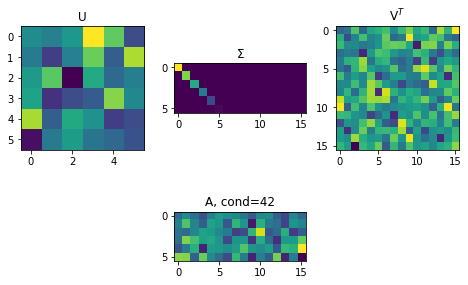

In [21]:
# plotting for above
fig = plt.subplots(1, figsize=(8, 5))

plt.subplot(231)
plt.imshow(U)
plt.title('U')

plt.subplot(232)
plt.imshow(S)
plt.title('$\Sigma$')

plt.subplot(233)
plt.imshow(V.T)
plt.title('V$^T$')

plt.subplot(235)
plt.imshow(A)
plt.title('A, cond=%g'%np.linalg.cond(A))

50


/var/folders/6d/f_j8q7_x503fwmm5309tyvxw0000gs/T/ipykernel_51771/3694697223.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  U = np.linalg.qr(np.random.randn(m, m))[0]
/var/folders/6d/f_j8q7_x503fwmm5309tyvxw0000gs/T/ipykernel_51771/3694697223.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  V = np.linalg.qr(np.random.randn(n, n))[0]
/var/folders/6d/f_j8q7_x503fwmm5309tyvxw0000gs/T/ipykernel_51771/3694697223.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  S = np.zeros((m, n))
/Users/learning/opt/anaconda3/envs/notebook/lib/python3.8/site-packages/numpy/lib/twodim_base.py:233: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m = zeros((N, M), dtype=dtype)
/Users/learning/opt/anaconda3/envs/notebook/lib

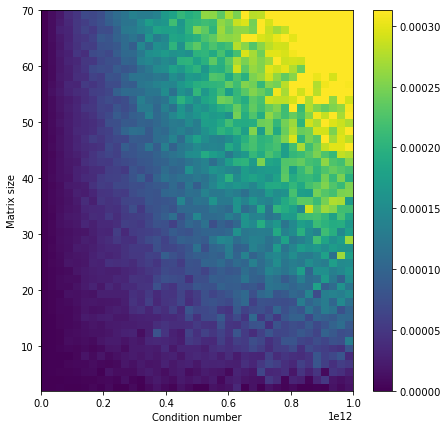

In [4]:
# Code Challenge: Why you avoid the inverse?

# 1) Create a matrix with a knonwn cond. number.
# 2) Compute its explicit iverse using inv().
# 3) Multiply the two to get I.
# 4) Compute the norm of the difference between I annd eye().
# 5) Repeat for matrices of size 2-70, and condition numbers between 10 and 10^12.
# 6) Show results in an image.

# Let's go
def createMCond(m=16, n=6, condnum=42):
    U = np.linalg.qr(np.random.randn(m, m))[0]
    V = np.linalg.qr(np.random.randn(n, n))[0]

    s = np.linspace(condnum, 1, min(m, n))
    S = np.zeros((m, n))
    for i in range(0, len(S)):
        S[i, i] = s[i]

    A = U @ S @ V.T
    return A

fromSize = 2
toSize = 70

matrixSizes = np.linspace(fromSize, toSize)

condNums = np.linspace(10, 1e12, 40)

print(len(matrixSizes))

m = len(matrixSizes)
n = len(condNums)
FinalMatrix = np.zeros((m, n))

for mi,M in enumerate(matrixSizes):
    for ci,C in enumerate(condNums):
        A = createMCond(M, M, C)
        AInv = np.linalg.inv(A)
        AIdent = A @ AInv

        normDiff = np.linalg.norm(np.abs(AIdent - np.eye(M)))
        FinalMatrix[mi, ci] = normDiff

fig = plt.figure(figsize=(7,7))
plt.pcolor(condNums, matrixSizes, FinalMatrix, vmax=np.max(FinalMatrix)*.6)
plt.xlabel('Condition number')
plt.ylabel('Matrix size')
plt.colorbar()

plt.show()


In [1]:
import numpy
numpy.version.version

'1.11.3'